In [18]:
from project_paths import *

import matplotlib
from matplotlib import pylab as plt

#### First, we check the shape of the data, the data types, and see whether we have a description of all the columns

In [19]:
# read the data
df = pd.read_csv(working_data_csv)
print("Row count:", df.shape[0], "Column count:", df.shape[1])

Row count: 39644 Column count: 61


In [20]:
default_row_count = pd.get_option("display.max_rows")
pd.set_option("display.max_rows", df.shape[1])
print(df.dtypes)
pd.set_option("display.max_rows", default_row_count)

url                               object
timedelta                        float64
n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max      

#### We find that all columns have type 'Float64' except the target variable, which is an integer, and the URL, which is just an identifier

In [21]:
# Creating some dictionaries for ease of visualization
nunique_dict = {c:df[c].nunique() for c in df.columns}
desc_dict = pd.read_csv(features_list).set_index("features").to_dict()["descriptions"]

In [22]:
# Now, for each feature, we print the count of unique values and a description of the feature
for col in df.columns:
    if col in ['timedelta', 'url']:
        continue
    print("Feature:", col, ":", desc_dict[col], ":", nunique_dict[col], " unique values")

Feature: n_tokens_title : Number of words in the title : 20  unique values
Feature: n_tokens_content : Number of words in the content : 2406  unique values
Feature: n_unique_tokens : Rate of unique words in the content : 27281  unique values
Feature: n_non_stop_words : Rate of non-stop words in the content : 1451  unique values
Feature: n_non_stop_unique_tokens : Rate of unique non-stop words in the content : 22930  unique values
Feature: num_hrefs : Number of links : 133  unique values
Feature: num_self_hrefs : Number of links to other articles published by Mashable : 59  unique values
Feature: num_imgs : Number of images : 91  unique values
Feature: num_videos : Number of videos : 53  unique values
Feature: average_token_length : Average length of the words in the content : 30136  unique values
Feature: num_keywords : Number of keywords in the metadata : 10  unique values
Feature: data_channel_is_lifestyle : Is data channel 'Lifestyle'? : 2  unique values
Feature: data_channel_is_ent

In [23]:
target = 'shares'
non_predictive_features = ['url', 'timedelta']
categorical_features = [
    'data_channel_is_lifestyle',
    'data_channel_is_entertainment',
    'data_channel_is_bus',
    'data_channel_is_socmed',
    'data_channel_is_tech',
    'data_channel_is_world',
    'weekday_is_monday',
    'weekday_is_tuesday',
    'weekday_is_wednesday',
    'weekday_is_thursday',
    'weekday_is_friday',
    'weekday_is_saturday',
    'weekday_is_sunday',
    'is_weekend',
]
continuous_features = [c for c in df.columns if c != target and c not in categorical_features and c not in non_predictive_features]

In [24]:
print(f"We have {len(categorical_features)} categorical features and {len(continuous_features)} continuous features")

We have 14 categorical features and 44 continuous features


#### Now that we have identified which variables are continuous and which ones are categorical, we can analyze each of them in turn

First, we explore the continuous features

In [34]:
def analyze_continuous_feature(var:str, var_col:pd.Series, variables_info_dict:dict):

    print("Variable:", var)
    print("Data description:", variables_info_dict[var])
    print("Unique value count:", var_col.nunique())
    print("Feature Describe:")
    print(var_col.describe())

    var_col.plot.hist(bins = int(np.sqrt(var_col.shape)))
    plt.xlabel(var)
    plt.ylabel('count')
    plt.show()

Variable: n_tokens_title
Data description: Number of words in the title
Unique value count: 20
Feature Describe:
count    39644.000000
mean        10.398749
std          2.114037
min          2.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         23.000000
Name: n_tokens_title, dtype: float64


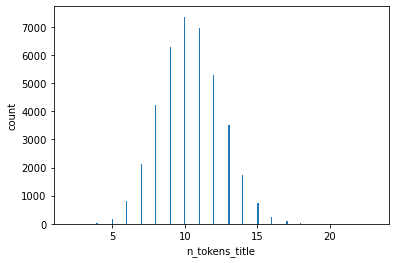


Variable: n_tokens_content
Data description: Number of words in the content
Unique value count: 2406
Feature Describe:
count    39644.000000
mean       546.514731
std        471.107508
min          0.000000
25%        246.000000
50%        409.000000
75%        716.000000
max       8474.000000
Name: n_tokens_content, dtype: float64


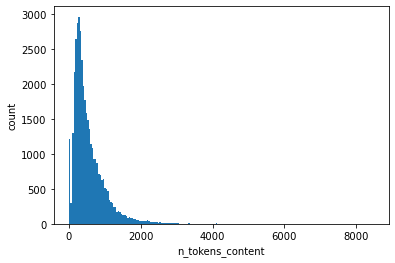


Variable: n_unique_tokens
Data description: Rate of unique words in the content
Unique value count: 27281
Feature Describe:
count    39644.000000
mean         0.548216
std          3.520708
min          0.000000
25%          0.470870
50%          0.539226
75%          0.608696
max        701.000000
Name: n_unique_tokens, dtype: float64


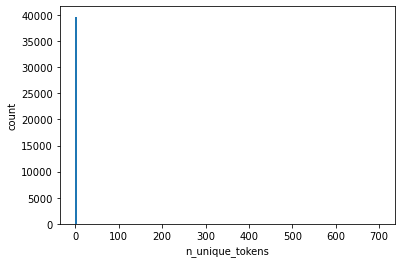


Variable: n_non_stop_words
Data description: Rate of non-stop words in the content
Unique value count: 1451
Feature Describe:
count    39644.000000
mean         0.996469
std          5.231231
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1042.000000
Name: n_non_stop_words, dtype: float64


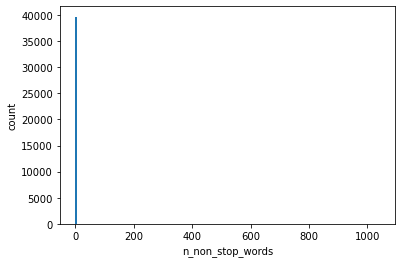


Variable: n_non_stop_unique_tokens
Data description: Rate of unique non-stop words in the content
Unique value count: 22930
Feature Describe:
count    39644.000000
mean         0.689175
std          3.264816
min          0.000000
25%          0.625739
50%          0.690476
75%          0.754630
max        650.000000
Name: n_non_stop_unique_tokens, dtype: float64


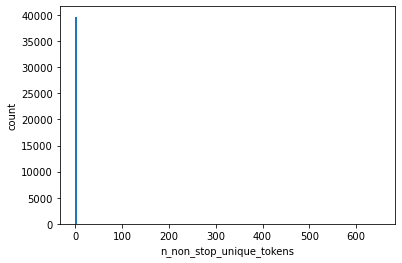


Variable: num_hrefs
Data description: Number of links
Unique value count: 133
Feature Describe:
count    39644.000000
mean        10.883690
std         11.332017
min          0.000000
25%          4.000000
50%          8.000000
75%         14.000000
max        304.000000
Name: num_hrefs, dtype: float64


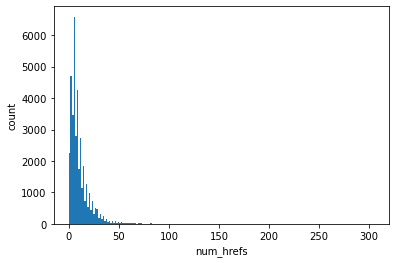


Variable: num_self_hrefs
Data description: Number of links to other articles published by Mashable
Unique value count: 59
Feature Describe:
count    39644.000000
mean         3.293638
std          3.855141
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max        116.000000
Name: num_self_hrefs, dtype: float64


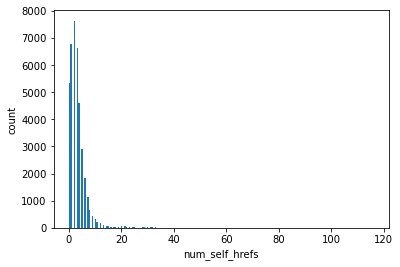


Variable: num_imgs
Data description: Number of images
Unique value count: 91
Feature Describe:
count    39644.000000
mean         4.544143
std          8.309434
min          0.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        128.000000
Name: num_imgs, dtype: float64


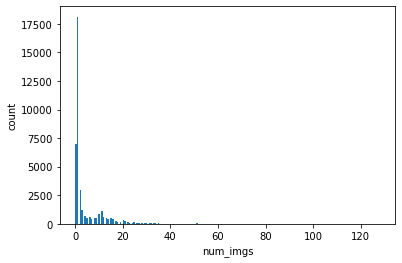


Variable: num_videos
Data description: Number of videos
Unique value count: 53
Feature Describe:
count    39644.000000
mean         1.249874
std          4.107855
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         91.000000
Name: num_videos, dtype: float64


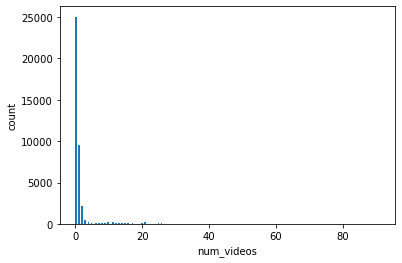


Variable: average_token_length
Data description: Average length of the words in the content
Unique value count: 30136
Feature Describe:
count    39644.000000
mean         4.548239
std          0.844406
min          0.000000
25%          4.478404
50%          4.664082
75%          4.854839
max          8.041534
Name: average_token_length, dtype: float64


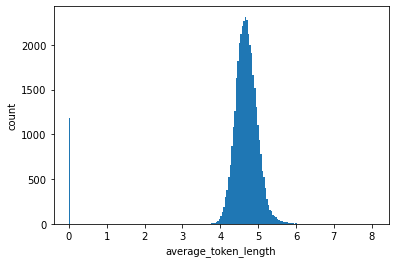


Variable: num_keywords
Data description: Number of keywords in the metadata
Unique value count: 10
Feature Describe:
count    39644.000000
mean         7.223767
std          1.909130
min          1.000000
25%          6.000000
50%          7.000000
75%          9.000000
max         10.000000
Name: num_keywords, dtype: float64


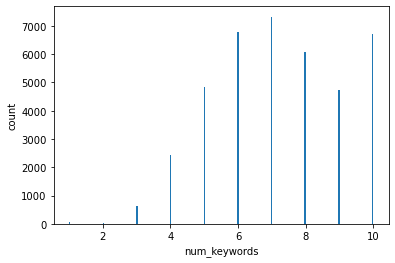


Variable: kw_min_min
Data description: Worst keyword (min. shares)
Unique value count: 26
Feature Describe:
count    39644.000000
mean        26.106801
std         69.633215
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          4.000000
max        377.000000
Name: kw_min_min, dtype: float64


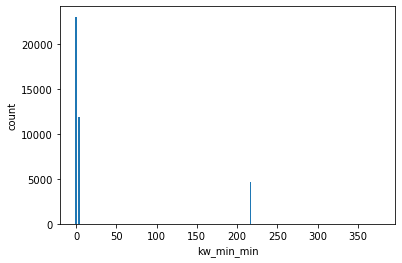


Variable: kw_max_min
Data description: Worst keyword (max. shares)
Unique value count: 1076
Feature Describe:
count     39644.000000
mean       1153.951682
std        3857.990877
min           0.000000
25%         445.000000
50%         660.000000
75%        1000.000000
max      298400.000000
Name: kw_max_min, dtype: float64


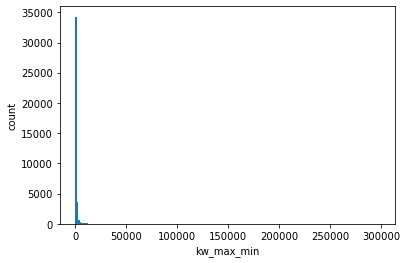


Variable: kw_avg_min
Data description: Worst keyword (avg. shares)
Unique value count: 17003
Feature Describe:
count    39644.000000
mean       312.366967
std        620.783887
min         -1.000000
25%        141.750000
50%        235.500000
75%        357.000000
max      42827.857143
Name: kw_avg_min, dtype: float64


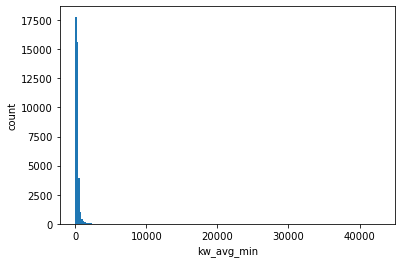


Variable: kw_min_max
Data description: Best keyword (min. shares)
Unique value count: 1021
Feature Describe:
count     39644.000000
mean      13612.354102
std       57986.029357
min           0.000000
25%           0.000000
50%        1400.000000
75%        7900.000000
max      843300.000000
Name: kw_min_max, dtype: float64


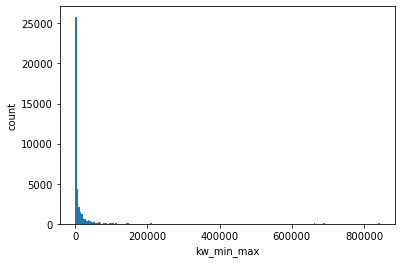


Variable: kw_max_max
Data description: Best keyword (max. shares)
Unique value count: 35
Feature Describe:
count     39644.000000
mean     752324.066694
std      214502.129573
min           0.000000
25%      843300.000000
50%      843300.000000
75%      843300.000000
max      843300.000000
Name: kw_max_max, dtype: float64


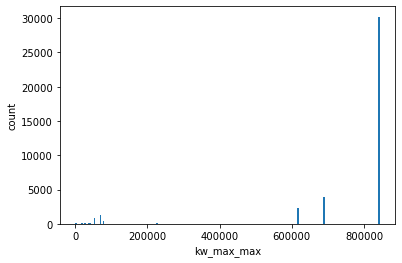


Variable: kw_avg_max
Data description: Best keyword (avg. shares)
Unique value count: 30834
Feature Describe:
count     39644.000000
mean     259281.938083
std      135102.247285
min           0.000000
25%      172846.875000
50%      244572.222223
75%      330980.000000
max      843300.000000
Name: kw_avg_max, dtype: float64


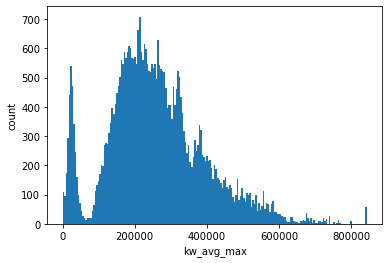


Variable: kw_min_avg
Data description: Avg. keyword (min. shares)
Unique value count: 15982
Feature Describe:
count    39644.000000
mean      1117.146610
std       1137.456951
min         -1.000000
25%          0.000000
50%       1023.635611
75%       2056.781032
max       3613.039819
Name: kw_min_avg, dtype: float64


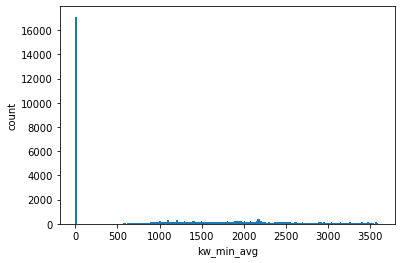


Variable: kw_max_avg
Data description: Avg. keyword (max. shares)
Unique value count: 19438
Feature Describe:
count     39644.000000
mean       5657.211151
std        6098.871957
min           0.000000
25%        3562.101631
50%        4355.688836
75%        6019.953968
max      298400.000000
Name: kw_max_avg, dtype: float64


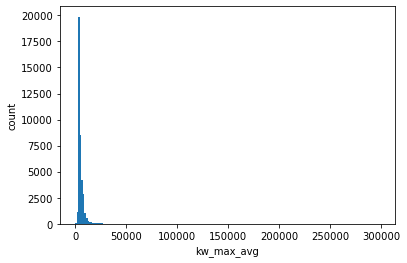


Variable: kw_avg_avg
Data description: Avg. keyword (avg. shares)
Unique value count: 39300
Feature Describe:
count    39644.000000
mean      3135.858639
std       1318.150397
min          0.000000
25%       2382.448566
50%       2870.074878
75%       3600.229564
max      43567.659946
Name: kw_avg_avg, dtype: float64


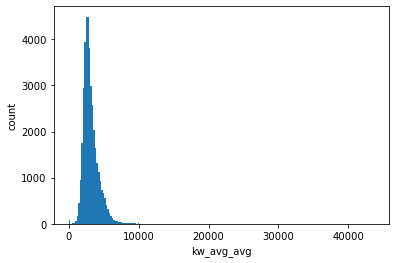


Variable: self_reference_min_shares
Data description: Min. shares of referenced articles in Mashable
Unique value count: 1255
Feature Describe:
count     39644.000000
mean       3998.755396
std       19738.670516
min           0.000000
25%         639.000000
50%        1200.000000
75%        2600.000000
max      843300.000000
Name: self_reference_min_shares, dtype: float64


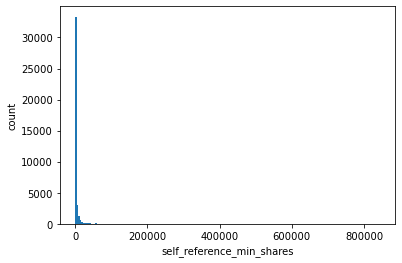


Variable: self_reference_max_shares
Data description: Max. shares of referenced articles in Mashable
Unique value count: 1137
Feature Describe:
count     39644.000000
mean      10329.212662
std       41027.576613
min           0.000000
25%        1100.000000
50%        2800.000000
75%        8000.000000
max      843300.000000
Name: self_reference_max_shares, dtype: float64


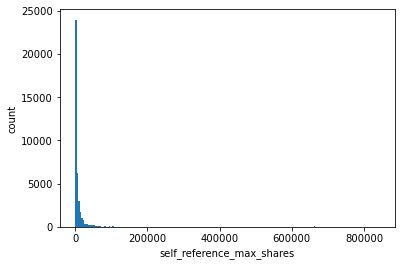


Variable: self_reference_avg_sharess
Data description: Avg. shares of referenced articles in Mashable
Unique value count: 8626
Feature Describe:
count     39644.000000
mean       6401.697580
std       24211.332231
min           0.000000
25%         981.187500
50%        2200.000000
75%        5200.000000
max      843300.000000
Name: self_reference_avg_sharess, dtype: float64


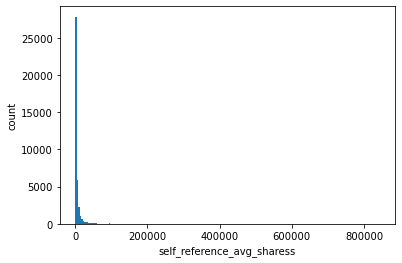


Variable: LDA_00
Data description: Closeness to LDA topic 0 
Unique value count: 39337
Feature Describe:
count    39644.000000
mean         0.184599
std          0.262975
min          0.000000
25%          0.025051
50%          0.033387
75%          0.240958
max          0.926994
Name: LDA_00, dtype: float64


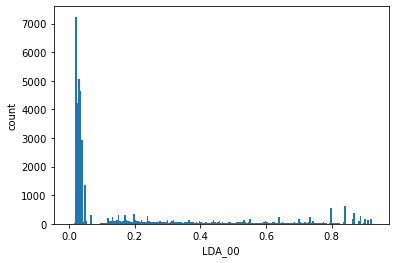


Variable: LDA_01
Data description: Closeness to LDA topic 1 
Unique value count: 39098
Feature Describe:
count    39644.000000
mean         0.141256
std          0.219707
min          0.000000
25%          0.025012
50%          0.033345
75%          0.150831
max          0.925947
Name: LDA_01, dtype: float64


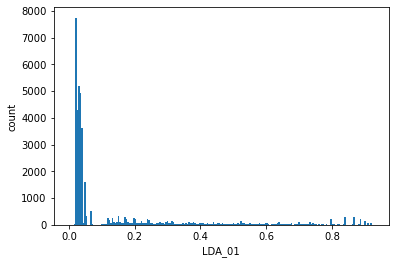


Variable: LDA_02
Data description: Closeness to LDA topic 2 
Unique value count: 39525
Feature Describe:
count    39644.000000
mean         0.216321
std          0.282145
min          0.000000
25%          0.028571
50%          0.040004
75%          0.334218
max          0.919999
Name: LDA_02, dtype: float64


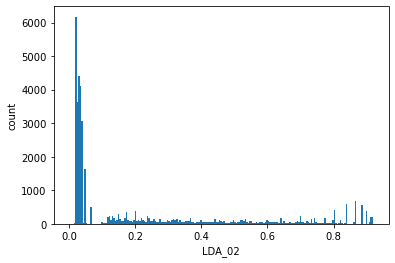


Variable: LDA_03
Data description: Closeness to LDA topic 3 
Unique value count: 38963
Feature Describe:
count    39644.000000
mean         0.223770
std          0.295191
min          0.000000
25%          0.028571
50%          0.040001
75%          0.375763
max          0.926534
Name: LDA_03, dtype: float64


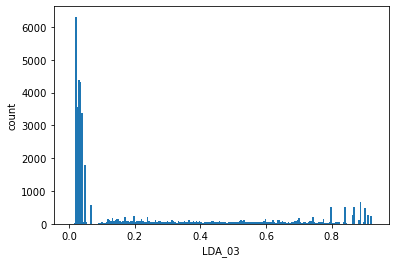


Variable: LDA_04
Data description: Closeness to LDA topic 4
Unique value count: 39370
Feature Describe:
count    39644.000000
mean         0.234029
std          0.289183
min          0.000000
25%          0.028574
50%          0.040727
75%          0.399986
max          0.927191
Name: LDA_04, dtype: float64


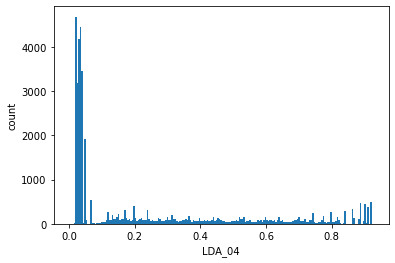


Variable: global_subjectivity
Data description: Text subjectivity
Unique value count: 34501
Feature Describe:
count    39644.000000
mean         0.443370
std          0.116685
min          0.000000
25%          0.396167
50%          0.453457
75%          0.508333
max          1.000000
Name: global_subjectivity, dtype: float64


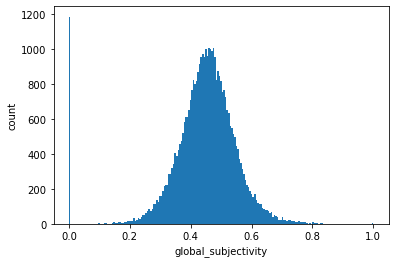


Variable: global_sentiment_polarity
Data description: Text sentiment polarity
Unique value count: 34695
Feature Describe:
count    39644.000000
mean         0.119309
std          0.096931
min         -0.393750
25%          0.057757
50%          0.119117
75%          0.177832
max          0.727841
Name: global_sentiment_polarity, dtype: float64


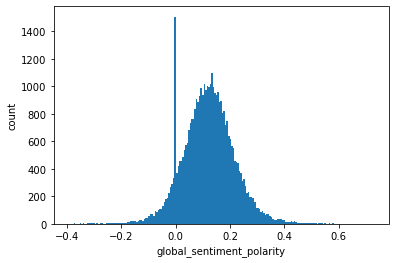


Variable: global_rate_positive_words
Data description: Rate of positive words in the content
Unique value count: 13159
Feature Describe:
count    39644.000000
mean         0.039625
std          0.017429
min          0.000000
25%          0.028384
50%          0.039023
75%          0.050279
max          0.155488
Name: global_rate_positive_words, dtype: float64


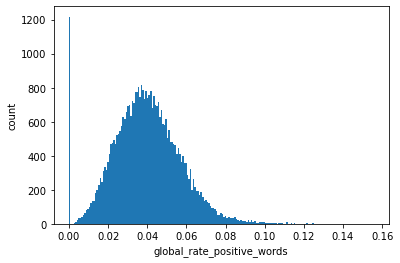


Variable: global_rate_negative_words
Data description: Rate of negative words in the content
Unique value count: 10271
Feature Describe:
count    39644.000000
mean         0.016612
std          0.010828
min          0.000000
25%          0.009615
50%          0.015337
75%          0.021739
max          0.184932
Name: global_rate_negative_words, dtype: float64


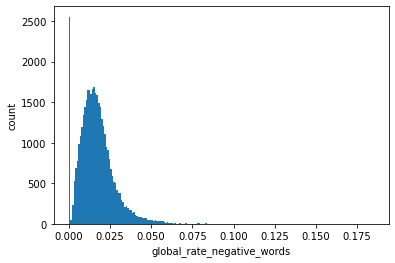


Variable: rate_positive_words
Data description: Rate of positive words among non-neutral tokens
Unique value count: 2284
Feature Describe:
count    39644.000000
mean         0.682150
std          0.190206
min          0.000000
25%          0.600000
50%          0.710526
75%          0.800000
max          1.000000
Name: rate_positive_words, dtype: float64


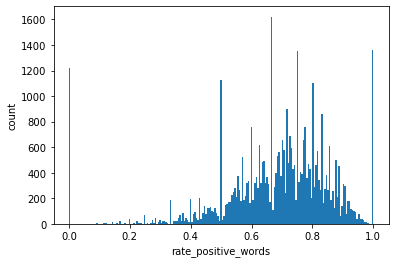


Variable: rate_negative_words
Data description: Rate of negative words among non-neutral tokens
Unique value count: 2284
Feature Describe:
count    39644.000000
mean         0.287934
std          0.156156
min          0.000000
25%          0.185185
50%          0.280000
75%          0.384615
max          1.000000
Name: rate_negative_words, dtype: float64


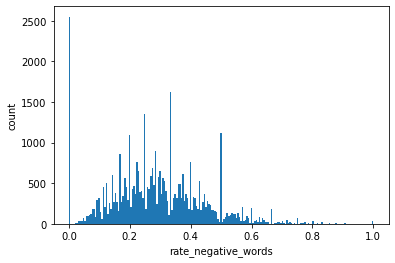


Variable: avg_positive_polarity
Data description: Avg. polarity of positive words
Unique value count: 27301
Feature Describe:
count    39644.000000
mean         0.353825
std          0.104542
min          0.000000
25%          0.306244
50%          0.358755
75%          0.411428
max          1.000000
Name: avg_positive_polarity, dtype: float64


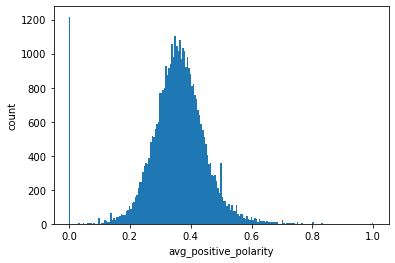


Variable: min_positive_polarity
Data description: Min. polarity of positive words
Unique value count: 33
Feature Describe:
count    39644.000000
mean         0.095446
std          0.071315
min          0.000000
25%          0.050000
50%          0.100000
75%          0.100000
max          1.000000
Name: min_positive_polarity, dtype: float64


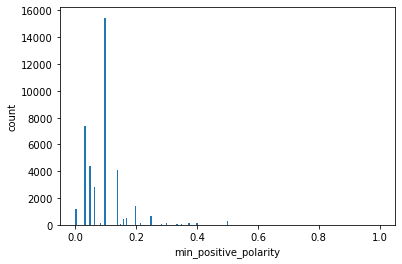


Variable: max_positive_polarity
Data description: Max. polarity of positive words
Unique value count: 38
Feature Describe:
count    39644.000000
mean         0.756728
std          0.247786
min          0.000000
25%          0.600000
50%          0.800000
75%          1.000000
max          1.000000
Name: max_positive_polarity, dtype: float64


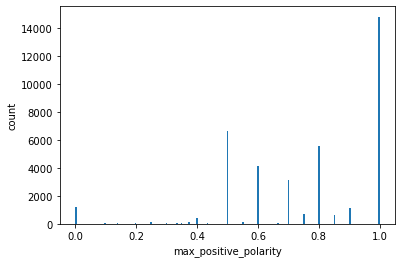


Variable: avg_negative_polarity
Data description: Avg. polarity of negative  words
Unique value count: 13841
Feature Describe:
count    39644.000000
mean        -0.259524
std          0.127726
min         -1.000000
25%         -0.328383
50%         -0.253333
75%         -0.186905
max          0.000000
Name: avg_negative_polarity, dtype: float64


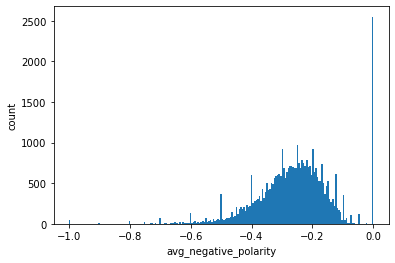


Variable: min_negative_polarity
Data description: Min. polarity of negative  words
Unique value count: 54
Feature Describe:
count    39644.000000
mean        -0.521944
std          0.290290
min         -1.000000
25%         -0.700000
50%         -0.500000
75%         -0.300000
max          0.000000
Name: min_negative_polarity, dtype: float64


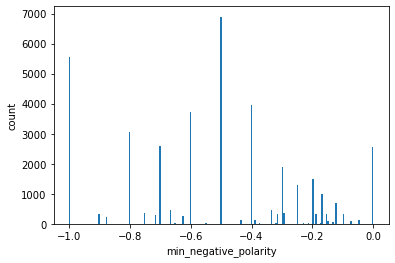


Variable: max_negative_polarity
Data description: Max. polarity of negative  words
Unique value count: 49
Feature Describe:
count    39644.000000
mean        -0.107500
std          0.095373
min         -1.000000
25%         -0.125000
50%         -0.100000
75%         -0.050000
max          0.000000
Name: max_negative_polarity, dtype: float64


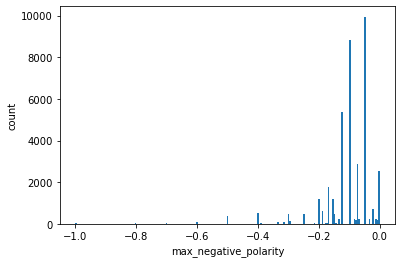


Variable: title_subjectivity
Data description: Title subjectivity
Unique value count: 673
Feature Describe:
count    39644.000000
mean         0.282353
std          0.324247
min          0.000000
25%          0.000000
50%          0.150000
75%          0.500000
max          1.000000
Name: title_subjectivity, dtype: float64


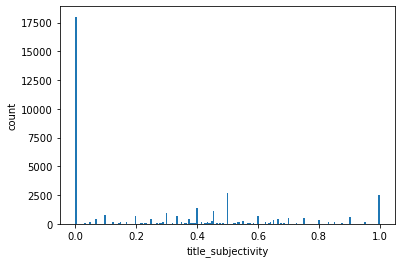


Variable: title_sentiment_polarity
Data description: Title polarity
Unique value count: 813
Feature Describe:
count    39644.000000
mean         0.071425
std          0.265450
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.150000
max          1.000000
Name: title_sentiment_polarity, dtype: float64


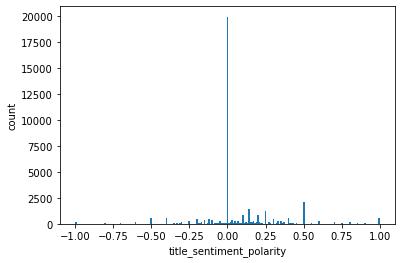


Variable: abs_title_subjectivity
Data description: Absolute subjectivity level
Unique value count: 532
Feature Describe:
count    39644.000000
mean         0.341843
std          0.188791
min          0.000000
25%          0.166667
50%          0.500000
75%          0.500000
max          0.500000
Name: abs_title_subjectivity, dtype: float64


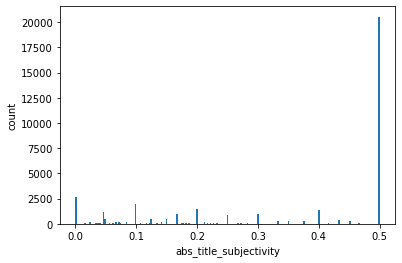


Variable: abs_title_sentiment_polarity
Data description: Absolute polarity level
Unique value count: 653
Feature Describe:
count    39644.000000
mean         0.156064
std          0.226294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.250000
max          1.000000
Name: abs_title_sentiment_polarity, dtype: float64


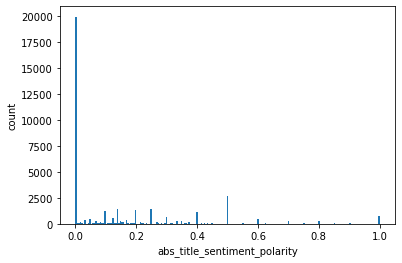

In [33]:
for f in continuous_features:
    analyze_continuous_feature(f, df[f], desc_dict)
    print()


We notice that several continuous features are very heavy-tailed. Most observations fall in to a narrow band, but some of them are very very high

In [37]:
def analyze_categorical_feature(var:str, var_col:pd.Series, variables_info_dict:dict):

    print("Variable:", var)
    print("Data description:", variables_info_dict[var])
    print("Unique value count:", var_col.nunique())
    print("Feature Value Counts:")
    print(var_col.value_counts())

    pd.value_counts(var_col, normalize=True).plot.bar()
    plt.ylabel('fraction')
    plt.show()


Variable: data_channel_is_lifestyle
Data description: Is data channel 'Lifestyle'?
Unique value count: 2
Feature Value Counts:
0.0    37545
1.0     2099
Name: data_channel_is_lifestyle, dtype: int64


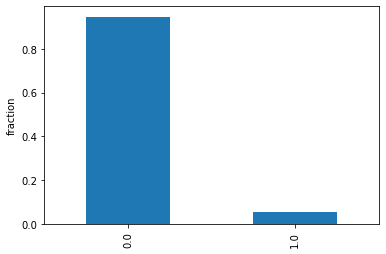


Variable: data_channel_is_entertainment
Data description: Is data channel 'Entertainment'?
Unique value count: 2
Feature Value Counts:
0.0    32587
1.0     7057
Name: data_channel_is_entertainment, dtype: int64


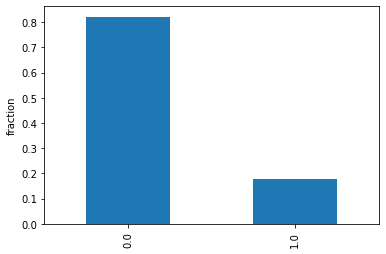


Variable: data_channel_is_bus
Data description: Is data channel 'Business'?
Unique value count: 2
Feature Value Counts:
0.0    33386
1.0     6258
Name: data_channel_is_bus, dtype: int64


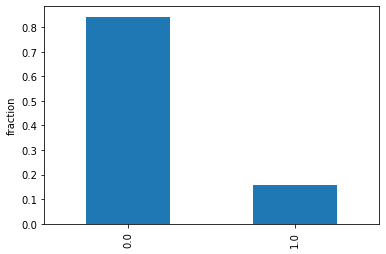


Variable: data_channel_is_socmed
Data description: Is data channel 'Social Media'?
Unique value count: 2
Feature Value Counts:
0.0    37321
1.0     2323
Name: data_channel_is_socmed, dtype: int64


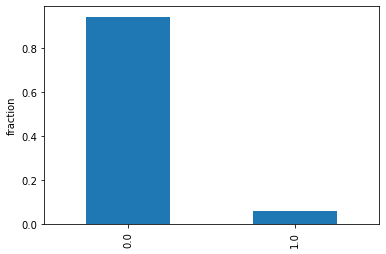


Variable: data_channel_is_tech
Data description: Is data channel 'Tech'?
Unique value count: 2
Feature Value Counts:
0.0    32298
1.0     7346
Name: data_channel_is_tech, dtype: int64


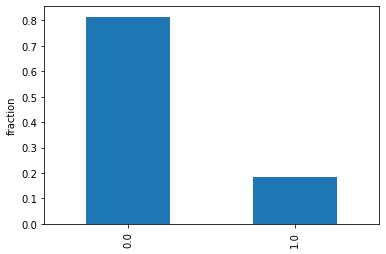


Variable: data_channel_is_world
Data description: Is data channel 'World'?
Unique value count: 2
Feature Value Counts:
0.0    31217
1.0     8427
Name: data_channel_is_world, dtype: int64


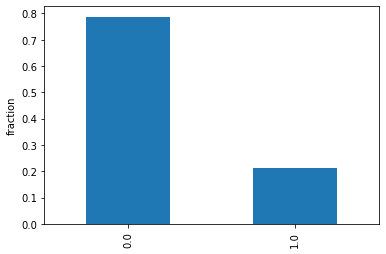


Variable: weekday_is_monday
Data description: Was the article published on a Monday?
Unique value count: 2
Feature Value Counts:
0.0    32983
1.0     6661
Name: weekday_is_monday, dtype: int64


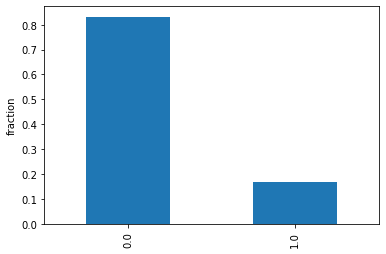


Variable: weekday_is_tuesday
Data description: Was the article published on a Tuesday?
Unique value count: 2
Feature Value Counts:
0.0    32254
1.0     7390
Name: weekday_is_tuesday, dtype: int64


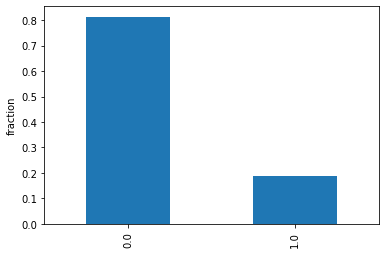


Variable: weekday_is_wednesday
Data description: Was the article published on a Wednesday?
Unique value count: 2
Feature Value Counts:
0.0    32209
1.0     7435
Name: weekday_is_wednesday, dtype: int64


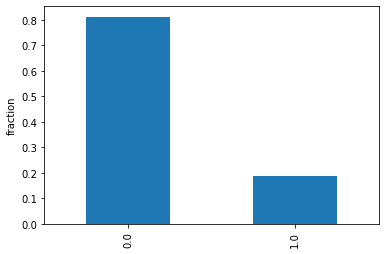


Variable: weekday_is_thursday
Data description: Was the article published on a Thursday?
Unique value count: 2
Feature Value Counts:
0.0    32377
1.0     7267
Name: weekday_is_thursday, dtype: int64


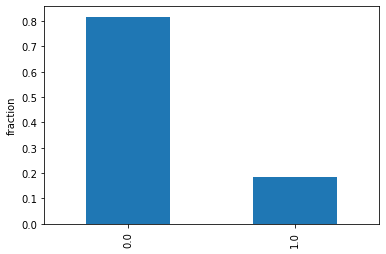


Variable: weekday_is_friday
Data description: Was the article published on a Friday?
Unique value count: 2
Feature Value Counts:
0.0    33943
1.0     5701
Name: weekday_is_friday, dtype: int64


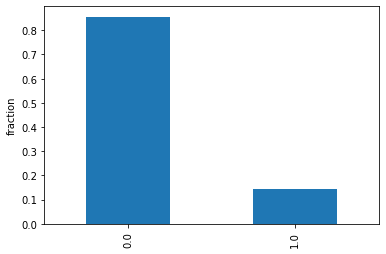


Variable: weekday_is_saturday
Data description: Was the article published on a Saturday?
Unique value count: 2
Feature Value Counts:
0.0    37191
1.0     2453
Name: weekday_is_saturday, dtype: int64


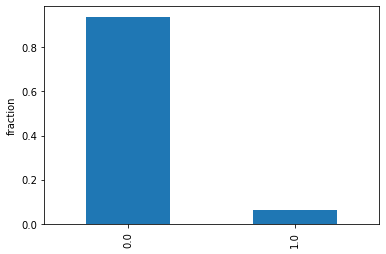


Variable: weekday_is_sunday
Data description: Was the article published on a Sunday?
Unique value count: 2
Feature Value Counts:
0.0    36907
1.0     2737
Name: weekday_is_sunday, dtype: int64


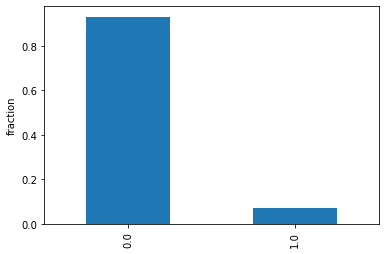


Variable: is_weekend
Data description: Was the article published on the weekend? 
Unique value count: 2
Feature Value Counts:
0.0    34454
1.0     5190
Name: is_weekend, dtype: int64


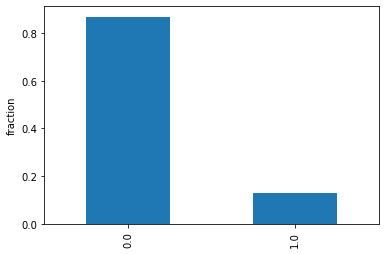

In [38]:
for f in categorical_features:
    analyze_categorical_feature(f, df[f], desc_dict)
    print()


There are fewer articles about lifestyle and social media than other subjects
Fewer articles are published on an average on weekend days than on week days